<h2>Gradient descent</h2>

Gradient descent is the backbone of the learning process for various algorithms, including linear regression, logistic regression, support vector machines, and neural networks which serves as a fundamental optimization technique to minimize the cost function of a model by iteratively adjusting the model parameters to reduce the difference between predicted and actual values, improving the model's performance.

Source: <a href="https://www.geeksforgeeks.org/gradient-descent-algorithm-and-its-variants/" target="_blank">GeeksForGeeks</a>

Epoch 0, Loss: 0.8936
Epoch 100, Loss: 0.2851
Epoch 200, Loss: 0.2091
Epoch 300, Loss: 0.1749
Epoch 400, Loss: 0.1543
Epoch 500, Loss: 0.1402
Epoch 600, Loss: 0.1298
Epoch 700, Loss: 0.1216
Epoch 800, Loss: 0.1151
Epoch 900, Loss: 0.1096


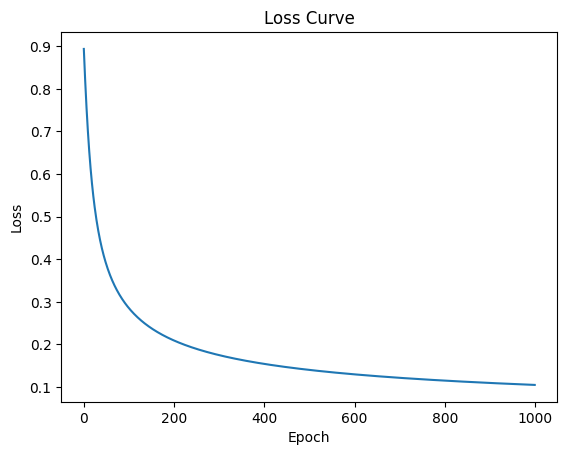

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def sigmoid_derivative(z):
    return sigmoid(z) * (1 - sigmoid(z))

def binary_cross_entropy(y_true, y_pred):
    eps = 1e-15
    y_pred = np.clip(y_pred, eps, 1 - eps)
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

np.random.seed(0)
X = np.random.randn(100, 2)
y = (X[:, 0] + X[:, 1] > 0).astype(int).reshape(-1, 1)  # Linearly separable

w = np.random.randn(2, 1)
b = 0.0

lr = 0.1
epochs = 1000

losses = []

for epoch in range(epochs):
    # Forward pass
    z = np.dot(X, w) + b
    y_pred = sigmoid(z)

    # Loss function
    loss = binary_cross_entropy(y, y_pred)
    losses.append(loss)

    # Gradients
    dz = y_pred - y # shape: (100, 1)
    dw = np.dot(X.T, dz) / len(X) # shape: (2, 1)
    db = np.sum(dz) / len(X) # scalar

    # Gradient descent update
    w -= lr * dw
    b -= lr * db

    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Loss: {loss:.4f}")

plt.plot(losses)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss Curve")
plt.show()